### Cargar los Datos

In [1]:
import pandas as pd

# Cargar los datos
train_data = pd.read_csv("data_train.csv")
test_data = pd.read_csv("data_test.csv")

# Visualizar las primeras filas
print("Train Data Overview:")
print(train_data.head())
print("\nTest Data Overview:")
print(test_data.head())


Train Data Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

### Análisis Inicial

In [2]:
# Realizaremos un análisis rápido para comprender la estructura de los datos:
# Dimensiones y columnas:


print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print("\nColumns in Train Data:\n", train_data.columns)


Train Data Shape: (891, 12)
Test Data Shape: (418, 11)

Columns in Train Data:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
# Tipos de datos y valores faltantes:

print("\nData Types and Missing Values in Train Data:")
print(train_data.info())

print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())



Data Types and Missing Values in Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket    

In [4]:
# Descriptivo inicial:

print("\nStatistical Summary of Train Data:")
print(train_data.describe(include="all"))



Statistical Summary of Train Data:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embark

### Limpieza de Datos

In [5]:
# Identificar y manejar valores faltantes:

# Ver valores faltantes
print(train_data.isnull().sum())

# Ejemplo de tratamiento: llenar valores faltantes
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\busin\AppData\Local\Temp\ipykernel_8568\3751651940.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\busin\AppData\Local\Temp\ipykernel_8568\3751651940.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [6]:
# Eliminar columnas irrelevantes: Si identificamos columnas que no aportan valor al análisis, podemos eliminarlas.

train_data.drop(['Cabin'], axis=1, inplace=True)


### Visualización de Datos

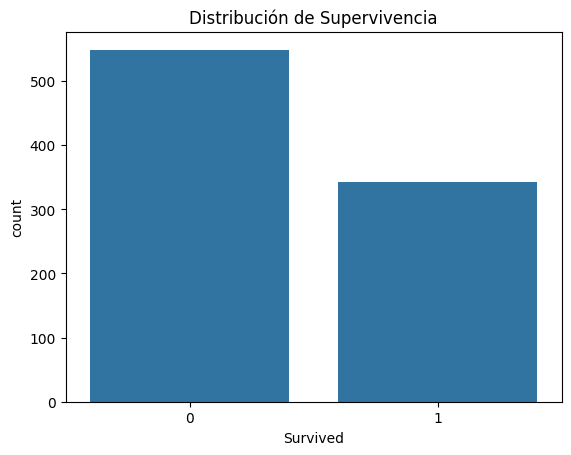

In [7]:
# Utilizaremos gráficos para explorar las relaciones y distribuciones.
# Distribución de supervivientes:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=train_data)
plt.title('Distribución de Supervivencia')
plt.show()


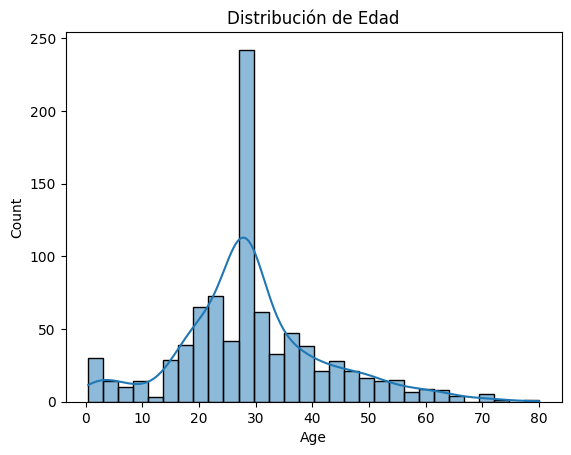

In [8]:
# Distribución de edades:

sns.histplot(train_data['Age'], kde=True, bins=30)
plt.title('Distribución de Edad')
plt.show()


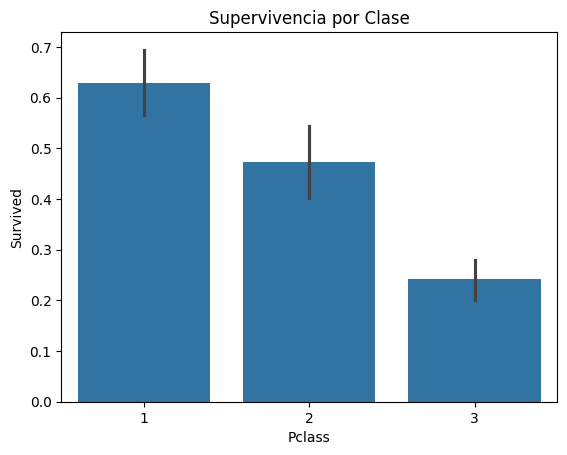

In [9]:
# Relación entre clase y supervivencia:

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Supervivencia por Clase')
plt.show()


### Análisis Estadístico Descriptivo

In [10]:
# Obtenemos medidas como la media, mediana, moda, y métricas de dispersión:

print("\nMedidas de Tendencia Central y Dispersión:")
print("Edad - Media:", train_data['Age'].mean())
print("Edad - Mediana:", train_data['Age'].median())
print("Edad - Moda:", train_data['Age'].mode()[0])
print("Edad - Desviación Estándar:", train_data['Age'].std())



Medidas de Tendencia Central y Dispersión:
Edad - Media: 29.36158249158249
Edad - Mediana: 28.0
Edad - Moda: 28.0
Edad - Desviación Estándar: 13.019696550973201


### Codificar Variables Categóricas

In [12]:
# Convertir 'Sex' en variable binaria
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# Convertir 'Embarked' en variables dummy
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)


In [14]:
# Verificar los tipos de datos en el dataset
print(train_data.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object


#### Eliminar columnas irrelevantes

In [15]:
# Eliminar columnas irrelevantes
train_data_filtered = train_data.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')

# Verificar nuevamente las columnas
print(train_data_filtered.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object


##### Manejar valores faltantes

In [16]:
# Verificar valores faltantes
print(train_data_filtered.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64


### Correlación y Análisis de Variables

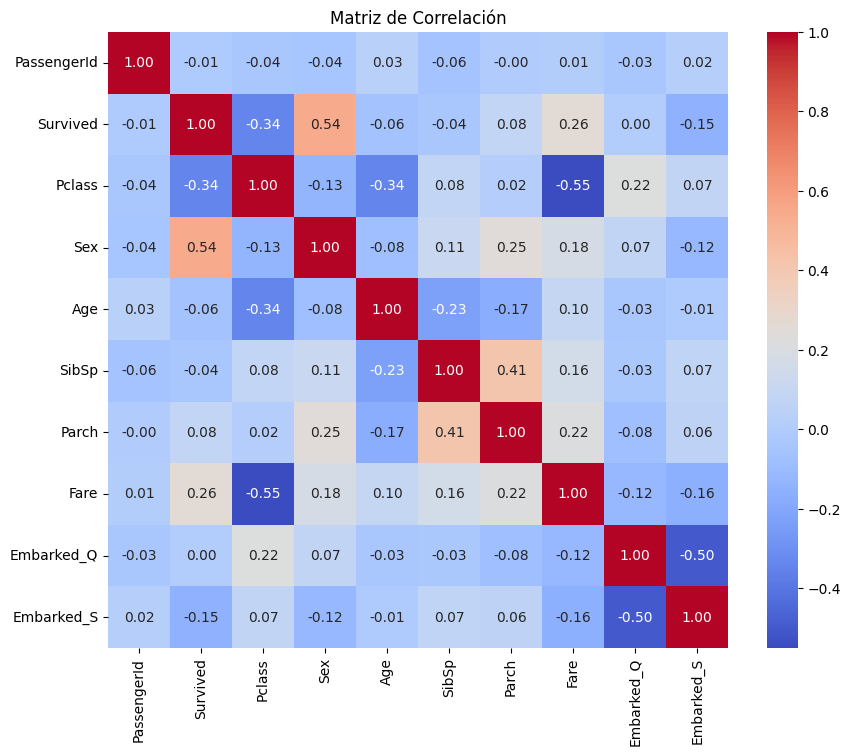

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = train_data_filtered.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


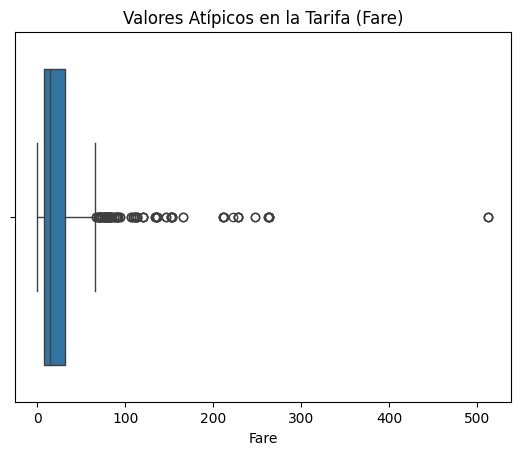

In [ ]:
# Boxplot para identificar valores atípicos (ej., Fare):

sns.boxplot(x=train_data['Fare'])
plt.title('Valores Atípicos en la Tarifa (Fare)')
plt.show()


### Análisis de Relación entre Variables

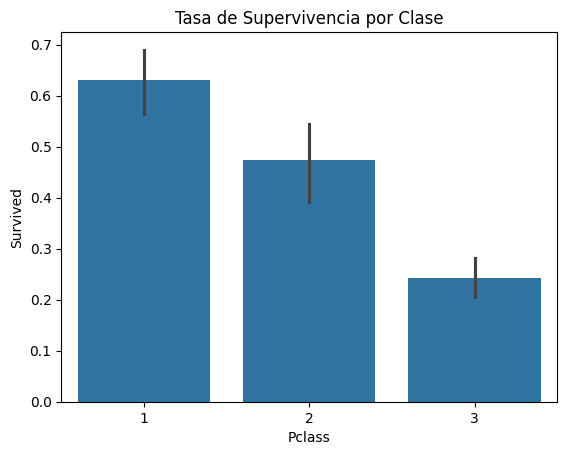

In [20]:
# Relación entre Pclass y Survived (Supervivencia por Clase):

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Tasa de Supervivencia por Clase')
plt.show()


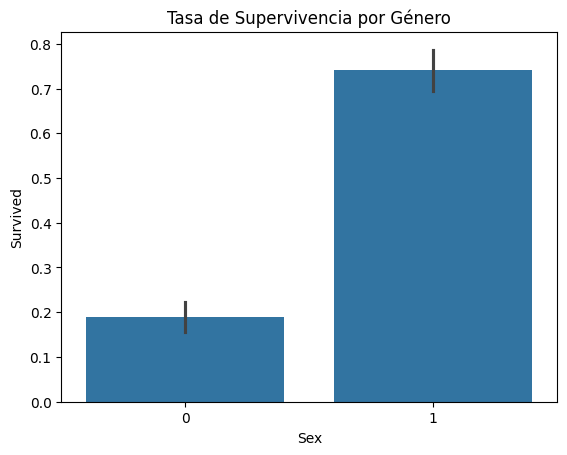

In [21]:
# Relación entre Sex y Survived:

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Tasa de Supervivencia por Género')
plt.show()


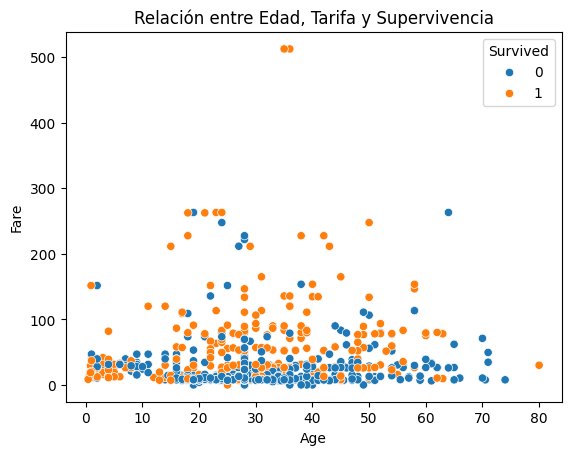

In [22]:
# Relación entre Age y Fare:

sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Relación entre Edad, Tarifa y Supervivencia')
plt.show()


### Creación de Nuevas Variables

Aumentar el valor de los datos creando variables derivadas que ayuden en el análisis.

In [23]:
# Tamaño de la familia:

train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch']


In [24]:
# Categorías de edad:

train_data['Age_Group'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])


In [25]:
# Categorías de tarifa:

train_data['Fare_Group'] = pd.qcut(train_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


### Análisis de Correlación

Objetivo:
Investigar multicolinealidad y relaciones clave.


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selección de variables numéricas relevantes
numeric_vars = train_data[['Pclass', 'Age', 'Fare', 'Family_Size']]

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_vars.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_vars.values, i) for i in range(len(numeric_vars.columns))]
print(vif_data)


      Variable       VIF
0       Pclass  3.637200
1          Age  3.875646
2         Fare  1.659866
3  Family_Size  1.517608


### Análisis de Segmentación y Agrupación

Objetivo:
Identificar patrones en los datos usando clustering.

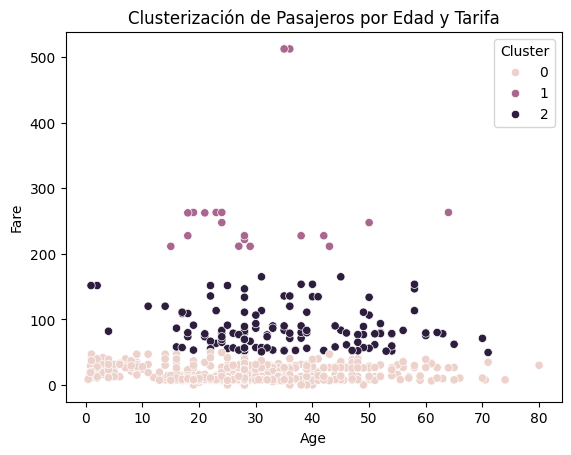

In [28]:
# Clusterización con K-Means:

from sklearn.cluster import KMeans

# Selección de variables para clusterización
cluster_data = train_data[['Age', 'Fare']].dropna()

# Modelo de K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(cluster_data)

sns.scatterplot(x='Age', y='Fare', hue='Cluster', data=train_data)
plt.title('Clusterización de Pasajeros por Edad y Tarifa')
plt.show()


### Evaluación de Distribución y Normalidad

Objetivo:
Evaluar si las variables numéricas siguen una distribución normal, útil para ciertos análisis estadísticos.

In [29]:
# Prueba de normalidad (Shapiro-Wilk):

from scipy.stats import shapiro

stat, p = shapiro(train_data['Age'].dropna())
print("Prueba de Shapiro-Wilk para 'Age': p =", p)


Prueba de Shapiro-Wilk para 'Age': p = 4.651141686041376e-16


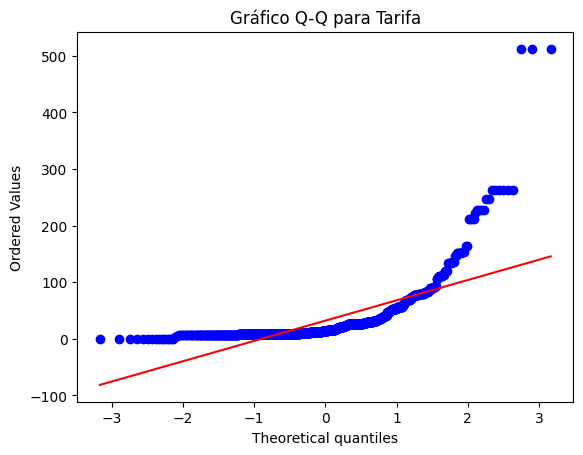

In [30]:
# Distribución de variables con gráfico Q-Q:

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(train_data['Fare'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Tarifa')
plt.show()


In [31]:
train_data.to_csv("processed_train_data.csv", index=False)


### Aplicar PCA

In [39]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo variables numéricas
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']  # Puedes ajustar según lo que necesites
data_numeric = train_data[numeric_features].dropna()

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


In [40]:
# Reducimos las dimensiones a dos componentes principales para facilitar la visualización.

# Aplicar PCA
pca = PCA(n_components=2)  # Selección de 2 componentes principales
pca_result = pca.fit_transform(data_scaled)

# Crear un DataFrame con los resultados
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Survived'] = train_data['Survived'].iloc[data_numeric.index]  # Añadir la columna de supervivencia


### Analizar la Varianza Explicada

Es importante revisar cuánta de la varianza de los datos originales está capturada por las componentes principales.

Varianza explicada por cada componente principal:
[0.29935785 0.28047506]


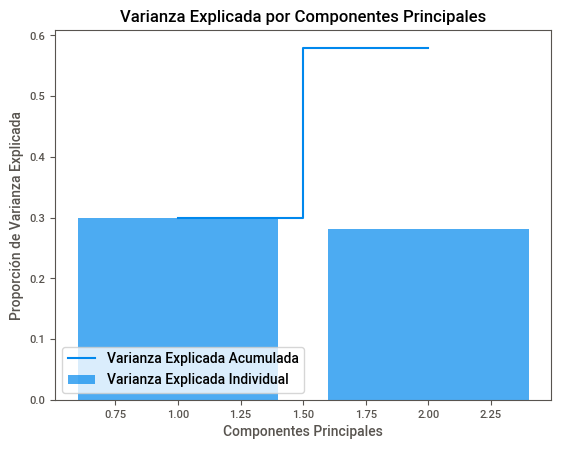

In [41]:
# Mostrar la proporción de varianza explicada por cada componente
print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Gráfico de barras de la varianza explicada
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Varianza Explicada Individual')
plt.step(range(1, 3), pca.explained_variance_ratio_.cumsum(), where='mid', label='Varianza Explicada Acumulada')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend(loc='best')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()


### Visualización de los Resultados

reamos un gráfico de dispersión para observar la distribución de los datos en el espacio de las componentes principales.

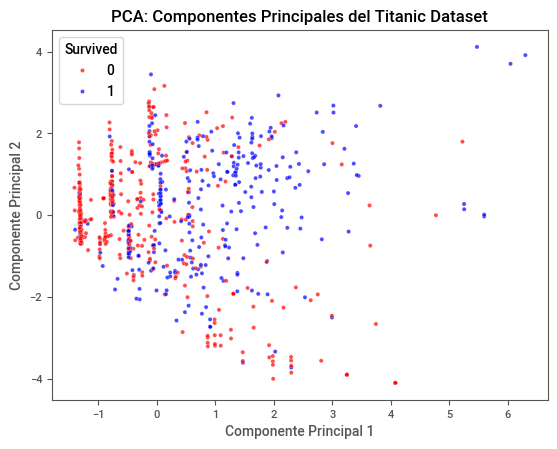

In [42]:
# Gráfico de dispersión de las componentes principales
sns.scatterplot(x='PCA1', y='PCA2', hue='Survived', data=pca_df, palette={0: 'red', 1: 'blue'}, alpha=0.7)
plt.title('PCA: Componentes Principales del Titanic Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


### Revisar las Variables Disponibles

In [43]:
# Ver todas las columnas en el dataset actual
print("Columnas en el dataset:")
print(train_data.columns)

# Ver las primeras filas del dataset para inspeccionar su estructura
print("\nPrimeras filas del dataset:")
print(train_data.head())


Columnas en el dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'Family_Size',
       'Age_Group', 'Fare_Group', 'Cluster'],
      dtype='object')

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket    

### Calcular la Matriz de Correlación

In [44]:
# Seleccionar solo columnas numéricas
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Mostrar la matriz de correlación
print("\nMatriz de correlación:")
print(correlation_matrix)



Matriz de correlación:
             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.339898  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.081163  0.114631   
Age             0.034212 -0.064910 -0.339898 -0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096688  0.159651   
Family_Size    -0.040143  0.016639  0.065997  0.200988 -0.245619  0.890712   

                Parch      Fare  Family_Size  
PassengerId -0.001652  0.012658    -0.040143  
Survived     0.081629  0.257307     0.016639  
Pclass       0.018443 -0.549500     0.065997  
Sex    

### Visualizar la Matriz de Correlación

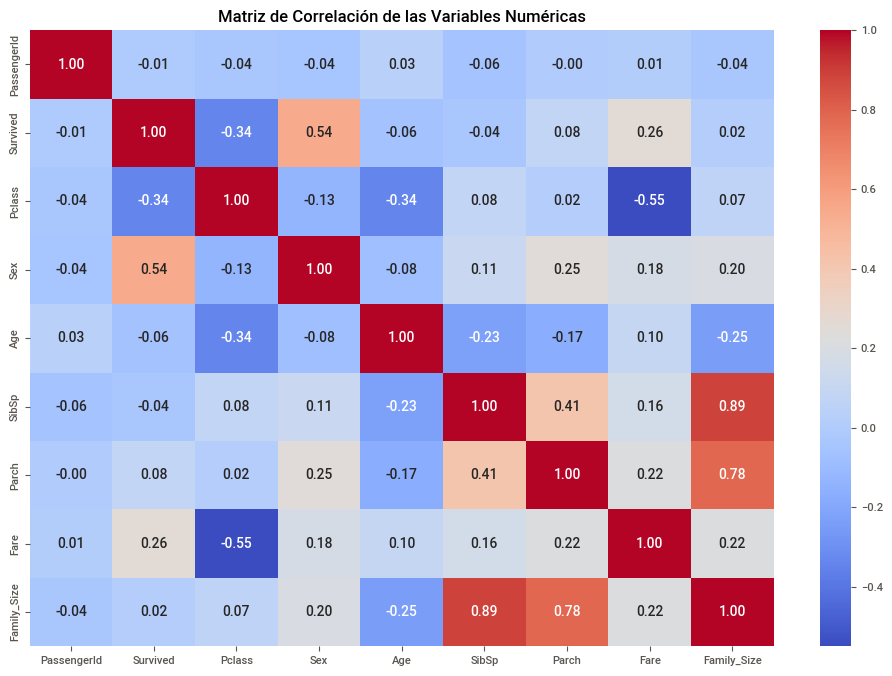

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación de las Variables Numéricas")
plt.show()
